In [1]:
import numpy as np
import pandas as pd
from scipy.stats import stats

# Preliminary

#### Offensiveness

In [3]:
white = pd.read_csv("offensiveness_white_random_results.csv")
black = pd.read_csv('offensiveness_black_random_results.csv')
male = pd.read_csv("offensiveness_male_random_results.csv")
female = pd.read_csv("offensiveness_female_random_results.csv")
base = pd.read_csv("offensiveness_base_random_results.csv")
person = pd.read_csv("offensiveness_results.csv")

person_r = person[['offensiveness_label', 'white_score', 'black_score', 'asian_score', 't5_base', 't5_person', 't5_white', 't5_black', 't5_asian']]
person_g = person[['offensiveness_label', 'man_score', 'woman_score', 't5_base', 't5_person', 't5_male', 't5_female']]

##### white-black

In [ ]:
person_r['sub_white'] = person_r['t5_white'] - white.sub(base).mean(axis=1)
person_r['sub_black'] = person_r['t5_black'] - black.sub(base).mean(axis=1)

In [6]:
person_r.corr()

,offensiveness_label,white_score,black_score,asian_score,t5_base,t5_person,t5_white,t5_black,t5_asian,sub_white,sub_black
offensiveness_label,1.000000,0.951949,0.665420,0.607914,0.558087,0.570271,0.532454,0.431274,0.477106,0.554747,0.498892
white_score,0.951949,1.000000,0.459541,0.412191,0.548040,0.557419,0.510847,0.413723,0.453439,0.534270,0.484500
black_score,0.665420,0.459541,1.000000,0.313313,0.319726,0.329783,0.336824,0.294883,0.306738,0.342041,0.312463
asian_score,0.607914,0.412191,0.313313,1.000000,0.333271,0.347682,0.281539,0.198625,0.255149,0.317430,0.269270
t5_base,0.558087,0.548040,0.319726,0.333271,1.000000,0.933484,0.728383,0.567464,0.709709,0.807262,0.731750
t5_person,0.570271,0.557419,0.329783,0.347682,0.933484,1.000000,0.726583,0.559246,0.710370,0.802923,0.721242
t5_white,0.532454,0.510847,0.336824,0.281539,0.728383,0.726583,1.000000,0.680823,0.775075,0.948819,0.698018
t5_black,0.431274,0.413723,0.294883,0.198625,0.567464,0.559246,0.680823,1.000000,0.702795,0.629556,0.919734
t5_asian,0.477106,0.453439,0.306738,0.255149,0.709709,0.710370,0.775075,0.702795,1.000000,0.731847,0.694249
sub_white,0.554747,0.534270,0.342041,0.317430,0.807262,0.802923,0.948819,0.629556,0.731847,1.000000,0.754800


In [7]:
person_r.dropna(subset=['black_score', 'asian_score']).corr()

,offensiveness_label,white_score,black_score,asian_score,t5_base,t5_person,t5_white,t5_black,t5_asian,sub_white,sub_black
offensiveness_label,1.000000,0.917546,0.648711,0.612459,0.539212,0.573728,0.519986,0.453187,0.495705,0.540354,0.505610
white_score,0.917546,1.000000,0.421772,0.413215,0.532598,0.555905,0.491974,0.424926,0.464118,0.512934,0.481328
black_score,0.648711,0.421772,1.000000,0.313313,0.272229,0.305791,0.288527,0.300034,0.295695,0.289522,0.303074
asian_score,0.612459,0.413215,0.313313,1.000000,0.307996,0.338761,0.260606,0.181801,0.243576,0.297253,0.252025
t5_base,0.539212,0.532598,0.272229,0.307996,1.000000,0.937065,0.745979,0.639349,0.709192,0.828304,0.779932
t5_person,0.573728,0.555905,0.305791,0.338761,0.937065,1.000000,0.740941,0.626516,0.709282,0.831977,0.772541
t5_white,0.519986,0.491974,0.288527,0.260606,0.745979,0.740941,1.000000,0.732685,0.824093,0.948261,0.725490
t5_black,0.453187,0.424926,0.300034,0.181801,0.639349,0.626516,0.732685,1.000000,0.774118,0.692807,0.924663
t5_asian,0.495705,0.464118,0.295695,0.243576,0.709192,0.709282,0.824093,0.774118,1.000000,0.772379,0.731454
sub_white,0.540354,0.512934,0.289522,0.297253,0.828304,0.831977,0.948261,0.692807,0.772379,1.000000,0.793032


##### male-female

In [ ]:
person_g['sub_male'] = person_g['t5_male'] - male.sub(base).mean(axis=1)
person_g['sub_female'] = person_g['t5_female'] - female.sub(base).mean(axis=1)

In [9]:
person_g.corr()

,offensiveness_label,man_score,woman_score,t5_base,t5_person,t5_male,t5_female,sub_male,sub_female
offensiveness_label,1.000000,0.859597,0.886194,0.558087,0.570271,0.559087,0.572129,0.555073,0.563895
man_score,0.859597,1.000000,0.588440,0.464815,0.478396,0.457415,0.480209,0.454905,0.469426
woman_score,0.886194,0.588440,1.000000,0.499301,0.507934,0.505532,0.508472,0.500212,0.504494
t5_base,0.558087,0.464815,0.499301,1.000000,0.933484,0.906419,0.905807,0.907187,0.899353
t5_person,0.570271,0.478396,0.507934,0.933484,1.000000,0.920499,0.921859,0.915895,0.910092
t5_male,0.559087,0.457415,0.505532,0.906419,0.920499,1.000000,0.944830,0.978893,0.914260
t5_female,0.572129,0.480209,0.508472,0.905807,0.921859,0.944830,1.000000,0.925963,0.970221
sub_male,0.555073,0.454905,0.500212,0.907187,0.915895,0.978893,0.925963,1.000000,0.931657
sub_female,0.563895,0.469426,0.504494,0.899353,0.910092,0.914260,0.970221,0.931657,1.000000


In [11]:
person_g.dropna(subset=['man_score', 'woman_score']).corr()

,offensiveness_label,man_score,woman_score,t5_base,t5_person,t5_male,t5_female,sub_male,sub_female
offensiveness_label,1.000000,0.858588,0.884791,0.555200,0.565591,0.554994,0.569235,0.550957,0.560888
man_score,0.858588,1.000000,0.588440,0.463690,0.477402,0.457575,0.479219,0.455589,0.468929
woman_score,0.884791,0.588440,1.000000,0.496425,0.503407,0.500530,0.505463,0.494776,0.501016
t5_base,0.555200,0.463690,0.496425,1.000000,0.933227,0.908538,0.904927,0.909778,0.898028
t5_person,0.565591,0.477402,0.503407,0.933227,1.000000,0.921278,0.921275,0.916712,0.908834
t5_male,0.554994,0.457575,0.500530,0.908538,0.921278,1.000000,0.946287,0.978643,0.915496
t5_female,0.569235,0.479219,0.505463,0.904927,0.921275,0.946287,1.000000,0.927784,0.970074
sub_male,0.550957,0.455589,0.494776,0.909778,0.916712,0.978643,0.927784,1.000000,0.933489
sub_female,0.560888,0.468929,0.501016,0.898028,0.908834,0.915496,0.970074,0.933489,1.000000


##### drop missing values

In [17]:
person_r.corr()

,offensiveness_label,white_score,black_score,asian_score,t5_person,t5_white,t5_black,t5_asian
offensiveness_label,1.000000,0.951949,0.665420,0.607914,0.570271,0.532454,0.431274,0.477106
white_score,0.951949,1.000000,0.459541,0.412191,0.557419,0.510847,0.413723,0.453439
black_score,0.665420,0.459541,1.000000,0.313313,0.329783,0.336824,0.294883,0.306738
asian_score,0.607914,0.412191,0.313313,1.000000,0.347682,0.281539,0.198625,0.255149
t5_person,0.570271,0.557419,0.329783,0.347682,1.000000,0.726583,0.559246,0.710370
t5_white,0.532454,0.510847,0.336824,0.281539,0.726583,1.000000,0.680823,0.775075
t5_black,0.431274,0.413723,0.294883,0.198625,0.559246,0.680823,1.000000,0.702795
t5_asian,0.477106,0.453439,0.306738,0.255149,0.710370,0.775075,0.702795,1.000000


In [10]:
person_r_m = person_r[['offensiveness_label', 'white_score', 'black_score', 'asian_score', 't5_person', 't5_white', 't5_black', 't5_asian']].dropna(subset=['black_score', 'asian_score'])
person_r_m.corr()

,offensiveness_label,white_score,black_score,asian_score,t5_person,t5_white,t5_black,t5_asian
offensiveness_label,1.000000,0.917546,0.648711,0.612459,0.573728,0.519986,0.453187,0.495705
white_score,0.917546,1.000000,0.421772,0.413215,0.555905,0.491974,0.424926,0.464118
black_score,0.648711,0.421772,1.000000,0.313313,0.305791,0.288527,0.300034,0.295695
asian_score,0.612459,0.413215,0.313313,1.000000,0.338761,0.260606,0.181801,0.243576
t5_person,0.573728,0.555905,0.305791,0.338761,1.000000,0.740941,0.626516,0.709282
t5_white,0.519986,0.491974,0.288527,0.260606,0.740941,1.000000,0.732685,0.824093
t5_black,0.453187,0.424926,0.300034,0.181801,0.626516,0.732685,1.000000,0.774118
t5_asian,0.495705,0.464118,0.295695,0.243576,0.709282,0.824093,0.774118,1.000000


In [11]:
person_r_m

,offensiveness_label,white_score,black_score,asian_score,t5_person,t5_white,t5_black,t5_asian
6,3.375000,3.400000,5.0,2.0,5.0,5.0,5.0,5.0
7,1.500000,1.750000,1.0,2.0,3.0,3.0,1.0,1.0
9,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0
12,2.333333,2.166667,2.0,4.0,5.0,5.0,5.0,5.0
13,1.111111,1.250000,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
1487,2.888889,2.666667,3.5,3.0,3.0,1.0,1.0,1.0
1488,1.111111,1.200000,1.0,1.0,3.0,3.0,1.0,1.0
1490,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0
1491,2.555556,2.666667,4.0,2.0,3.0,1.0,1.0,1.0


#### Politeness

In [13]:
white_1 = pd.read_csv("politeness_white_random_results.csv")
black_1 = pd.read_csv('politeness_black_random_results.csv')
male_1 = pd.read_csv("politeness_male_random_results.csv")
female_1 = pd.read_csv("politeness_female_random_results.csv")
base_1 = pd.read_csv("politeness_base_random_results.csv")
person_1 = pd.read_csv("politeness_1500_results.csv")

person_r_1 = person_1[['label', 'white_score', 'black_score', 'asian_score', 't5_base', 't5_person', 't5_white', 't5_black', 't5_asian']]
person_g_1 = person_1[['label', 'man_score', 'woman_score', 't5_base', 't5_person', 't5_male', 't5_female']]

##### white-black

In [ ]:
person_r_1['sub_white'] = person_r_1['t5_white'] - white_1.sub(base_1).mean(axis=1)
person_r_1['sub_black'] = person_r_1['t5_black'] - black_1.sub(base_1).mean(axis=1)

In [15]:
person_r_1.corr()

,label,white_score,black_score,asian_score,t5_base,t5_person,t5_white,t5_black,t5_asian,sub_white,sub_black
label,1.000000,0.967456,0.754684,0.706913,0.723891,0.736521,0.722879,0.714978,0.679190,0.711486,0.704259
white_score,0.967456,1.000000,0.615351,0.570061,0.711432,0.725183,0.704443,0.701378,0.670846,0.695676,0.692033
black_score,0.754684,0.615351,1.000000,0.385286,0.515162,0.512536,0.503734,0.512229,0.483203,0.489670,0.494922
asian_score,0.706913,0.570061,0.385286,1.000000,0.501097,0.492114,0.484847,0.484475,0.474944,0.475322,0.478809
t5_base,0.723891,0.711432,0.515162,0.501097,1.000000,0.957129,0.917587,0.894768,0.818919,0.912003,0.901532
t5_person,0.736521,0.725183,0.512536,0.492114,0.957129,1.000000,0.936701,0.914062,0.823810,0.925731,0.914974
t5_white,0.722879,0.704443,0.503734,0.484847,0.917587,0.936701,1.000000,0.893051,0.799857,0.988247,0.891142
t5_black,0.714978,0.701378,0.512229,0.484475,0.894768,0.914062,0.893051,1.000000,0.859817,0.882647,0.980360
t5_asian,0.679190,0.670846,0.483203,0.474944,0.818919,0.823810,0.799857,0.859817,1.000000,0.800652,0.842818
sub_white,0.711486,0.695676,0.489670,0.475322,0.912003,0.925731,0.988247,0.882647,0.800652,1.000000,0.902238


In [16]:
person_r_1.dropna(subset=['black_score', 'asian_score']).corr()

,label,white_score,black_score,asian_score,t5_base,t5_person,t5_white,t5_black,t5_asian,sub_white,sub_black
label,1.000000,0.941047,0.749332,0.682190,0.689564,0.692790,0.668879,0.691544,0.651346,0.656591,0.682530
white_score,0.941047,1.000000,0.604778,0.537327,0.678306,0.677459,0.645788,0.678692,0.641107,0.636185,0.670650
black_score,0.749332,0.604778,1.000000,0.385286,0.488010,0.474308,0.497582,0.503729,0.456483,0.486689,0.499506
asian_score,0.682190,0.537327,0.385286,1.000000,0.486219,0.470677,0.435912,0.444744,0.446666,0.433290,0.447132
t5_base,0.689564,0.678306,0.488010,0.486219,1.000000,0.948848,0.919081,0.895694,0.819801,0.914887,0.907557
t5_person,0.692790,0.677459,0.474308,0.470677,0.948848,1.000000,0.944219,0.911755,0.816301,0.931014,0.919713
t5_white,0.668879,0.645788,0.497582,0.435912,0.919081,0.944219,1.000000,0.900692,0.805213,0.988347,0.907998
t5_black,0.691544,0.678692,0.503729,0.444744,0.895694,0.911755,0.900692,1.000000,0.855450,0.888864,0.982100
t5_asian,0.651346,0.641107,0.456483,0.446666,0.819801,0.816301,0.805213,0.855450,1.000000,0.798835,0.837728
sub_white,0.656591,0.636185,0.486689,0.433290,0.914887,0.931014,0.988347,0.888864,0.798835,1.000000,0.916362


##### male-female

In [ ]:
person_g_1['sub_male'] = person_g_1['t5_male'] - male_1.sub(base_1).mean(axis=1)
person_g_1['sub_female'] = person_g_1['t5_female'] - female_1.sub(base_1).mean(axis=1)

In [18]:
person_g_1.corr()

,label,man_score,woman_score,t5_base,t5_person,t5_male,t5_female,sub_male,sub_female
label,1.000000,0.880489,0.921624,0.723891,0.736521,0.699901,0.709946,0.694278,0.708500
man_score,0.880489,1.000000,0.688175,0.633475,0.647475,0.618902,0.627755,0.615293,0.627608
woman_score,0.921624,0.688175,1.000000,0.668855,0.674009,0.637299,0.649861,0.631027,0.649022
t5_base,0.723891,0.633475,0.668855,1.000000,0.957129,0.899911,0.934652,0.891221,0.935506
t5_person,0.736521,0.647475,0.674009,0.957129,1.000000,0.909464,0.944277,0.897930,0.942965
t5_male,0.699901,0.618902,0.637299,0.899911,0.909464,1.000000,0.912750,0.984807,0.915566
t5_female,0.709946,0.627755,0.649861,0.934652,0.944277,0.912750,1.000000,0.903743,0.981495
sub_male,0.694278,0.615293,0.631027,0.891221,0.897930,0.984807,0.903743,1.000000,0.921742
sub_female,0.708500,0.627608,0.649022,0.935506,0.942965,0.915566,0.981495,0.921742,1.000000


In [19]:
person_g_1.dropna(subset=['man_score', 'woman_score']).corr()

,label,man_score,woman_score,t5_base,t5_person,t5_male,t5_female,sub_male,sub_female
label,1.000000,0.880035,0.920459,0.721912,0.734903,0.696947,0.708150,0.691005,0.706622
man_score,0.880035,1.000000,0.688175,0.633920,0.647947,0.619280,0.628294,0.615458,0.627992
woman_score,0.920459,0.688175,1.000000,0.665376,0.670686,0.633201,0.646528,0.626814,0.645729
t5_base,0.721912,0.633920,0.665376,1.000000,0.956014,0.898700,0.935259,0.889560,0.935446
t5_person,0.734903,0.647947,0.670686,0.956014,1.000000,0.908518,0.945038,0.896480,0.943046
t5_male,0.696947,0.619280,0.633201,0.898700,0.908518,1.000000,0.912867,0.984578,0.915305
t5_female,0.708150,0.628294,0.646528,0.935259,0.945038,0.912867,1.000000,0.903609,0.981312
sub_male,0.691005,0.615458,0.626814,0.889560,0.896480,0.984578,0.903609,1.000000,0.921551
sub_female,0.706622,0.627992,0.645729,0.935446,0.943046,0.915305,0.981312,0.921551,1.000000


##### drop missing values

In [12]:
person = pd.read_csv("politeness_r_results.csv")
person_r_m = person[['label', 'white_score', 'black_score', 'asian_score', 't5_person', 't5_white', 't5_black', 't5_asian']].dropna(subset=['black_score', 'asian_score'])

In [15]:
person[['label', 'white_score', 'black_score', 'asian_score', 't5_person', 't5_white', 't5_black', 't5_asian']].corr()

,label,white_score,black_score,asian_score,t5_person,t5_white,t5_black,t5_asian
label,1.000000,0.967456,0.754684,0.706913,0.736521,0.722879,0.714978,0.679190
white_score,0.967456,1.000000,0.615351,0.570061,0.725183,0.704443,0.701378,0.670846
black_score,0.754684,0.615351,1.000000,0.385286,0.512536,0.503734,0.512229,0.483203
asian_score,0.706913,0.570061,0.385286,1.000000,0.492114,0.484847,0.484475,0.474944
t5_person,0.736521,0.725183,0.512536,0.492114,1.000000,0.936701,0.914062,0.823810
t5_white,0.722879,0.704443,0.503734,0.484847,0.936701,1.000000,0.893051,0.799857
t5_black,0.714978,0.701378,0.512229,0.484475,0.914062,0.893051,1.000000,0.859817
t5_asian,0.679190,0.670846,0.483203,0.474944,0.823810,0.799857,0.859817,1.000000


In [13]:
person_r_m.corr()

,label,white_score,black_score,asian_score,t5_person,t5_white,t5_black,t5_asian
label,1.000000,0.941047,0.749332,0.682190,0.692790,0.668879,0.691544,0.651346
white_score,0.941047,1.000000,0.604778,0.537327,0.677459,0.645788,0.678692,0.641107
black_score,0.749332,0.604778,1.000000,0.385286,0.474308,0.497582,0.503729,0.456483
asian_score,0.682190,0.537327,0.385286,1.000000,0.470677,0.435912,0.444744,0.446666
t5_person,0.692790,0.677459,0.474308,0.470677,1.000000,0.944219,0.911755,0.816301
t5_white,0.668879,0.645788,0.497582,0.435912,0.944219,1.000000,0.900692,0.805213
t5_black,0.691544,0.678692,0.503729,0.444744,0.911755,0.900692,1.000000,0.855450
t5_asian,0.651346,0.641107,0.456483,0.446666,0.816301,0.805213,0.855450,1.000000


In [14]:
person_r_m

,label,white_score,black_score,asian_score,t5_person,t5_white,t5_black,t5_asian
16,2.750000,2.500000,2.500000,3.5,5.0,5.0,3.0,3.0
30,3.833333,3.750000,4.000000,4.0,3.0,3.0,3.0,3.0
31,4.166667,4.666667,4.000000,3.0,3.0,3.0,3.0,3.0
34,1.833333,1.000000,3.000000,2.5,3.0,3.0,3.0,3.0
41,4.375000,4.000000,5.000000,5.0,5.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...
1463,3.500000,3.000000,4.500000,3.0,3.0,3.0,3.0,3.0
1465,3.571429,4.000000,3.500000,2.0,5.0,5.0,5.0,3.0
1475,1.714286,1.500000,1.666667,2.0,1.0,1.0,1.0,1.0
1481,3.000000,2.333333,3.500000,3.5,1.0,1.0,1.0,1.0


# All current results

## Offensiveness

In [3]:
offensive_results_w = pd.read_table("offensive_results_w.tsv")
offensive_results_w = offensive_results_w.drop(['idx', 'instance_id', 'text'], axis=1)
offensive_corr = offensive_results_w.corr()

In [4]:
offensive_corr

,label,man_score,woman_score,white_score,black_score,asian_score,flant5_xxl_base,flant5_xxl_male,flant5_xxl_female,flant5_xxl_white,...,gpt35_female,gpt35_white,gpt35_black,gpt35_asian,gpt4_base,gpt4_male,gpt4_female,gpt4_white,gpt4_black,gpt4_asian
label,1.000000,0.859597,0.886194,0.951949,0.665420,0.607914,0.631097,0.616727,0.619689,0.611491,...,0.603269,0.495935,0.523415,0.542472,0.736057,0.667670,0.662789,0.576765,0.489748,0.502944
man_score,0.859597,1.000000,0.588440,0.819814,0.546541,0.536235,0.531962,0.519320,0.525466,0.519534,...,0.491989,0.410314,0.415402,0.467285,0.623180,0.570146,0.550277,0.504433,0.429941,0.445585
woman_score,0.886194,0.588440,1.000000,0.834325,0.619013,0.541024,0.556463,0.543495,0.543863,0.537631,...,0.540287,0.422746,0.444628,0.438604,0.651631,0.590399,0.596236,0.506463,0.425971,0.436423
white_score,0.951949,0.819814,0.834325,1.000000,0.459541,0.412191,0.601999,0.590558,0.598051,0.592527,...,0.582631,0.469052,0.482736,0.512408,0.719979,0.653479,0.650279,0.551553,0.471441,0.482460
black_score,0.665420,0.546541,0.619013,0.459541,1.000000,0.313313,0.417544,0.417209,0.408383,0.371676,...,0.418476,0.340423,0.300058,0.367114,0.459461,0.430246,0.411455,0.384071,0.302936,0.312859
asian_score,0.607914,0.536235,0.541024,0.412191,0.313313,1.000000,0.347551,0.346415,0.331729,0.347178,...,0.378051,0.353761,0.354819,0.349313,0.423542,0.404356,0.402360,0.379616,0.330594,0.329026
flant5_xxl_base,0.631097,0.531962,0.556463,0.601999,0.417544,0.347551,1.000000,0.941962,0.930495,0.855410,...,0.546400,0.445406,0.454952,0.453169,0.669470,0.548093,0.519722,0.442903,0.348785,0.350497
flant5_xxl_male,0.616727,0.519320,0.543495,0.590558,0.417209,0.346415,0.941962,1.000000,0.967244,0.843851,...,0.522576,0.418969,0.439380,0.434736,0.652721,0.531909,0.510161,0.426055,0.327718,0.337960
flant5_xxl_female,0.619689,0.525466,0.543863,0.598051,0.408383,0.331729,0.930495,0.967244,1.000000,0.844350,...,0.537943,0.433949,0.470517,0.452072,0.658946,0.535536,0.515834,0.426461,0.332801,0.339334
flant5_xxl_white,0.611491,0.519534,0.537631,0.592527,0.371676,0.347178,0.855410,0.843851,0.844350,1.000000,...,0.532493,0.459380,0.502127,0.500417,0.648240,0.577004,0.535028,0.493060,0.411552,0.411123


In [5]:
offensive_corr.loc['tulu2_7b_base':'tulu2_7b_asian', 'label':'asian_score']

,label,man_score,woman_score,white_score,black_score,asian_score
tulu2_7b_base,0.509620,0.422370,0.445397,0.502965,0.297576,0.294699
tulu2_7b_male,0.489790,0.416692,0.423472,0.486244,0.272874,0.272267
tulu2_7b_female,0.486120,0.407140,0.426638,0.480088,0.284273,0.283587
tulu2_7b_white,0.488245,0.399673,0.431426,0.489284,0.263391,0.278302
tulu2_7b_black,0.484541,0.410787,0.424841,0.478244,0.284934,0.303451
tulu2_7b_asian,0.496163,0.408242,0.445822,0.491355,0.292441,0.296050


In [6]:
offensive_corr.loc['tulu2_13b_base':'tulu2_13b_asian', 'label':'asian_score']

,label,man_score,woman_score,white_score,black_score,asian_score
tulu2_13b_base,0.482218,0.415269,0.416167,0.473899,0.304292,0.284412
tulu2_13b_male,0.413612,0.352273,0.355921,0.402120,0.247970,0.239218
tulu2_13b_female,0.416953,0.350370,0.361446,0.409816,0.236309,0.242062
tulu2_13b_white,0.442499,0.388766,0.373587,0.432776,0.258906,0.292111
tulu2_13b_black,0.426993,0.362031,0.366172,0.420467,0.247220,0.244123
tulu2_13b_asian,0.431189,0.359602,0.369795,0.423088,0.260735,0.270973


In [5]:
offensive_corr.loc['flant5_xxl_base':'flant5_xxl_asian', 'label':'asian_score']

,label,man_score,woman_score,white_score,black_score,asian_score
flant5_xxl_base,0.631097,0.531962,0.556463,0.601999,0.417544,0.347551
flant5_xxl_male,0.616727,0.519320,0.543495,0.590558,0.417209,0.346415
flant5_xxl_female,0.619689,0.525466,0.543863,0.598051,0.408383,0.331729
flant5_xxl_white,0.611491,0.519534,0.537631,0.592527,0.371676,0.347178
flant5_xxl_black,0.592991,0.509960,0.512741,0.578013,0.364397,0.322904
flant5_xxl_asian,0.630216,0.534983,0.547880,0.608205,0.409672,0.348800


In [6]:
offensive_corr.loc['flan_ul2_base':'flan_ul2_asian', 'label':'asian_score']

,label,man_score,woman_score,white_score,black_score,asian_score
flan_ul2_base,0.599214,0.504170,0.526765,0.575486,0.365873,0.395800
flan_ul2_male,0.572976,0.495999,0.491076,0.551039,0.345484,0.369557
flan_ul2_female,0.562906,0.486189,0.483184,0.544009,0.337812,0.370313
flan_ul2_white,0.558062,0.497217,0.473398,0.531327,0.359153,0.393748
flan_ul2_black,0.493266,0.427023,0.423231,0.470542,0.308406,0.344481
flan_ul2_asian,0.502680,0.446438,0.425217,0.486767,0.309602,0.344964


In [8]:
offensive_corr.loc['gpt35_base':'gpt35_asian', 'label':'asian_score']

,label,man_score,woman_score,white_score,black_score,asian_score
gpt35_base,0.620392,0.524356,0.543665,0.604027,0.388478,0.387677
gpt35_male,0.553963,0.465388,0.483422,0.545411,0.359120,0.320931
gpt35_female,0.603269,0.491989,0.540287,0.582631,0.418476,0.378051
gpt35_white,0.495935,0.410314,0.422746,0.469052,0.340423,0.353761
gpt35_black,0.523415,0.415402,0.444628,0.482736,0.300058,0.354819
gpt35_asian,0.542472,0.467285,0.438604,0.512408,0.367114,0.349313


In [9]:
offensive_corr.loc['gpt4_base':'gpt4_asian', 'label':'asian_score']

,label,man_score,woman_score,white_score,black_score,asian_score
gpt4_base,0.736057,0.623180,0.651631,0.719979,0.459461,0.423542
gpt4_male,0.667670,0.570146,0.590399,0.653479,0.430246,0.404356
gpt4_female,0.662789,0.550277,0.596236,0.650279,0.411455,0.402360
gpt4_white,0.576765,0.504433,0.506463,0.551553,0.384071,0.379616
gpt4_black,0.489748,0.429941,0.425971,0.471441,0.302936,0.330594
gpt4_asian,0.502944,0.445585,0.436423,0.482460,0.312859,0.329026


In [10]:
offensive_corr.loc[['flant5_xl_base', 'flant5_xxl_base', 'flan_ul2_base', 'gpt35_base', 'gpt4_base'], 'label':'asian_score']

,label,man_score,woman_score,white_score,black_score,asian_score
flant5_xl_base,0.570271,0.478396,0.507934,0.557419,0.329783,0.347682
flant5_xxl_base,0.631097,0.531962,0.556463,0.601999,0.417544,0.347551
flan_ul2_base,0.599214,0.504170,0.526765,0.575486,0.365873,0.395800
gpt35_base,0.620392,0.524356,0.543665,0.604027,0.388478,0.387677
gpt4_base,0.736057,0.623180,0.651631,0.719979,0.459461,0.423542


In [10]:
offensive_corr.to_csv("offensiveness_corr.csv")

## Politeness

In [7]:
polite_results_w = pd.read_table("polite_results_w.tsv")
polite_results_w = polite_results_w.drop(['idx', 'instance_id', 'text'], axis=1)
polite_corr = polite_results_w.corr()

In [8]:
polite_corr

,label,man_score,woman_score,white_score,black_score,asian_score,flant5_xxl_base,flant5_xxl_male,flant5_xxl_female,flant5_xxl_white,...,gpt35_female,gpt35_white,gpt35_black,gpt35_asian,gpt4_base,gpt4_male,gpt4_female,gpt4_white,gpt4_black,gpt4_asian
label,1.000000,0.871574,0.913951,0.961691,0.734787,0.740195,0.756501,0.757938,0.759441,0.752292,...,0.751437,0.710799,0.660932,0.669032,0.808958,0.799029,0.806673,0.793423,0.758574,0.801896
man_score,0.871574,1.000000,0.661776,0.840480,0.618979,0.637485,0.648945,0.650349,0.653197,0.643055,...,0.638577,0.607264,0.569225,0.566594,0.689919,0.682344,0.684632,0.673436,0.642280,0.677034
woman_score,0.913951,0.661776,1.000000,0.874859,0.704207,0.679497,0.702706,0.703294,0.701452,0.698311,...,0.699043,0.662279,0.611801,0.624538,0.752456,0.740722,0.751260,0.739299,0.711075,0.747160
white_score,0.961691,0.840480,0.874859,1.000000,0.570726,0.607198,0.735338,0.736822,0.739201,0.731613,...,0.727120,0.688802,0.644283,0.651833,0.782875,0.776300,0.782906,0.768807,0.736631,0.777126
black_score,0.734787,0.618979,0.704207,0.570726,1.000000,0.453552,0.549722,0.550997,0.547898,0.548454,...,0.547300,0.513947,0.483957,0.480419,0.586652,0.578396,0.576570,0.578311,0.550517,0.579764
asian_score,0.740195,0.637485,0.679497,0.607198,0.453552,1.000000,0.571145,0.568555,0.573973,0.562885,...,0.563677,0.530693,0.496534,0.488170,0.616786,0.600836,0.618315,0.597875,0.581190,0.624216
flant5_xxl_base,0.756501,0.648945,0.702706,0.735338,0.549722,0.571145,1.000000,0.966922,0.967683,0.961679,...,0.712914,0.687578,0.631075,0.625421,0.800879,0.785781,0.778490,0.779535,0.729539,0.782386
flant5_xxl_male,0.757938,0.650349,0.703294,0.736822,0.550997,0.568555,0.966922,1.000000,0.979763,0.966892,...,0.704934,0.679861,0.624208,0.617826,0.797195,0.781610,0.772864,0.774469,0.727832,0.776164
flant5_xxl_female,0.759441,0.653197,0.701452,0.739201,0.547898,0.573973,0.967683,0.979763,1.000000,0.962747,...,0.710399,0.684385,0.629867,0.623394,0.797978,0.781512,0.775363,0.775267,0.726573,0.779258
flant5_xxl_white,0.752292,0.643055,0.698311,0.731613,0.548454,0.562885,0.961679,0.966892,0.962747,1.000000,...,0.709035,0.685156,0.627747,0.624299,0.800687,0.786285,0.780722,0.781733,0.735338,0.781591


In [9]:
polite_corr.loc['tulu2_7b_base':'tulu2_7b_asian', 'label':'asian_score']

,label,man_score,woman_score,white_score,black_score,asian_score
tulu2_7b_base,0.649531,0.543343,0.599607,0.634792,0.471987,0.458561
tulu2_7b_male,0.650470,0.554377,0.599772,0.637528,0.470189,0.459195
tulu2_7b_female,0.650316,0.555374,0.598061,0.636017,0.467250,0.457509
tulu2_7b_white,0.648902,0.558960,0.598662,0.638871,0.456740,0.438384
tulu2_7b_black,0.673775,0.573289,0.619803,0.658420,0.483520,0.454207
tulu2_7b_asian,0.676949,0.572960,0.627172,0.663565,0.481316,0.457983


In [12]:
polite_corr.loc['tulu2_13b_base':'tulu2_13b_asian', 'label':'asian_score']

,label,man_score,woman_score,white_score,black_score,asian_score
tulu2_13b_base,0.678495,0.563662,0.636098,0.657928,0.486215,0.515233
tulu2_13b_male,0.647733,0.542472,0.605511,0.625965,0.481484,0.499008
tulu2_13b_female,0.646104,0.542565,0.601498,0.626767,0.475204,0.498710
tulu2_13b_white,0.655235,0.547705,0.613443,0.631779,0.480142,0.511234
tulu2_13b_black,0.652165,0.548532,0.608431,0.631165,0.477392,0.497428
tulu2_13b_asian,0.660860,0.551546,0.618799,0.641698,0.485695,0.506893


In [14]:
polite_corr.loc['flant5_xxl_base':'flant5_xxl_asian', 'label':'asian_score']

,label,man_score,woman_score,white_score,black_score,asian_score
flant5_xxl_base,0.756501,0.648945,0.702706,0.735338,0.549722,0.571145
flant5_xxl_male,0.757938,0.650349,0.703294,0.736822,0.550997,0.568555
flant5_xxl_female,0.759441,0.653197,0.701452,0.739201,0.547898,0.573973
flant5_xxl_white,0.752292,0.643055,0.698311,0.731613,0.548454,0.562885
flant5_xxl_black,0.751506,0.644678,0.696786,0.730575,0.543406,0.566495
flant5_xxl_asian,0.742299,0.639974,0.687391,0.722239,0.543342,0.560770


In [15]:
polite_corr.loc['flan_ul2_base':'flan_ul2_asian', 'label':'asian_score']

,label,man_score,woman_score,white_score,black_score,asian_score
flan_ul2_base,0.712399,0.616875,0.651624,0.691295,0.524231,0.518529
flan_ul2_male,0.701143,0.612420,0.637733,0.680477,0.514018,0.504361
flan_ul2_female,0.701138,0.611316,0.635668,0.680583,0.513596,0.503582
flan_ul2_white,0.708049,0.616312,0.643917,0.687112,0.519842,0.498840
flan_ul2_black,0.686873,0.602421,0.620686,0.665233,0.511263,0.494800
flan_ul2_asian,0.704106,0.613682,0.638735,0.685361,0.511352,0.509937


In [16]:
polite_corr.loc['gpt35_base':'gpt35_asian', 'label':'asian_score']

,label,man_score,woman_score,white_score,black_score,asian_score
gpt35_base,0.759671,0.645081,0.710082,0.736222,0.549708,0.571617
gpt35_male,0.739270,0.628840,0.689472,0.714836,0.531466,0.558722
gpt35_female,0.751437,0.638577,0.699043,0.727120,0.547300,0.563677
gpt35_white,0.710799,0.607264,0.662279,0.688802,0.513947,0.530693
gpt35_black,0.660932,0.569225,0.611801,0.644283,0.483957,0.496534
gpt35_asian,0.669032,0.566594,0.624538,0.651833,0.480419,0.488170


In [17]:
polite_corr.loc['gpt4_base':'gpt4_asian', 'label':'asian_score']

,label,man_score,woman_score,white_score,black_score,asian_score
gpt4_base,0.808958,0.689919,0.752456,0.782875,0.586652,0.616786
gpt4_male,0.799029,0.682344,0.740722,0.776300,0.578396,0.600836
gpt4_female,0.806673,0.684632,0.751260,0.782906,0.576570,0.618315
gpt4_white,0.793423,0.673436,0.739299,0.768807,0.578311,0.597875
gpt4_black,0.758574,0.642280,0.711075,0.736631,0.550517,0.581190
gpt4_asian,0.801896,0.677034,0.747160,0.777126,0.579764,0.624216


In [18]:
polite_corr.loc[['flant5_xl_base', 'flant5_xxl_base', 'flan_ul2_base', 'gpt35_base', 'gpt4_base'], 'label':'asian_score']

,label,man_score,woman_score,white_score,black_score,asian_score
flant5_xl_base,0.724365,0.634647,0.659689,0.710441,0.515289,0.527917
flant5_xxl_base,0.756501,0.648945,0.702706,0.735338,0.549722,0.571145
flan_ul2_base,0.712399,0.616875,0.651624,0.691295,0.524231,0.518529
gpt35_base,0.759671,0.645081,0.710082,0.736222,0.549708,0.571617
gpt4_base,0.808958,0.689919,0.752456,0.782875,0.586652,0.616786


In [11]:
polite_corr.to_csv("politeness_corr.csv")

# Robustness Check

## Offensiveness

In [4]:
offensive_prompts_w = pd.read_table("offensive_prompts_w.tsv")
offensive_prompts_w = offensive_prompts_w.drop(['instance_id', 'text'], axis=1)
offensive_p_corr = offensive_prompts_w.corr()

### P1

How does {i} rate how {j} the sentence is from 1 (not {j} at all) to 5 (very {j}). Options: 1, 2, 3, 4, 5:

In [6]:
offensive_p_corr.loc['p1_flant5_xxl_base':'p1_flan_ul2_average', 'label':'asian_score']

,label,man_score,woman_score,white_score,black_score,asian_score
p1_flant5_xxl_base,0.631097,0.531962,0.556463,0.601999,0.417544,0.347551
p1_flant5_xxl_man,0.610756,0.511517,0.536587,0.588965,0.398269,0.334622
p1_flant5_xxl_woman,0.620277,0.520312,0.543145,0.598008,0.400607,0.337676
p1_flant5_xxl_male,0.606761,0.514482,0.529167,0.579926,0.407921,0.339295
p1_flant5_xxl_female,0.620481,0.526232,0.540718,0.599248,0.402075,0.338776
p1_flant5_xxl_white,0.611491,0.519534,0.537631,0.592527,0.371676,0.347178
p1_flant5_xxl_black,0.592991,0.509960,0.512741,0.578013,0.364397,0.322904
p1_flant5_xxl_asian,0.630216,0.534983,0.547880,0.608205,0.409672,0.348800
p1_flant5_xxl_normal,0.614000,0.518515,0.538696,0.589096,0.399201,0.347210
p1_flant5_xxl_ordinary,0.620262,0.523949,0.543846,0.597405,0.397561,0.350340


### P2

If you are {i}, how would you rate the {j}ness of the given sentence from 1 (not {j} at all) to 5 (very {j}). Options: 1, 2, 3, 4, 5: 

In [7]:
offensive_p_corr.loc['p2_flant5_xxl_base':'p2_flan_ul2_average', 'label':'asian_score']

,label,man_score,woman_score,white_score,black_score,asian_score
p2_flant5_xxl_base,0.615965,0.520371,0.537069,0.591059,0.408453,0.333886
p2_flant5_xxl_man,0.601605,0.517951,0.516117,0.582347,0.373541,0.339844
p2_flant5_xxl_woman,0.598882,0.518828,0.515684,0.581510,0.362260,0.339357
p2_flant5_xxl_male,0.606299,0.520305,0.521381,0.584943,0.381371,0.356033
p2_flant5_xxl_female,0.609740,0.520783,0.529948,0.591844,0.378654,0.339627
p2_flant5_xxl_white,0.568975,0.497186,0.484056,0.543238,0.360757,0.339838
p2_flant5_xxl_black,0.555548,0.484895,0.481027,0.544605,0.341823,0.306898
p2_flant5_xxl_asian,0.614520,0.533362,0.526758,0.592418,0.378301,0.351445
p2_flant5_xxl_normal,0.608783,0.515521,0.531705,0.587392,0.386641,0.335046
p2_flant5_xxl_ordinary,0.605076,0.517227,0.521828,0.588321,0.378080,0.321997


### P3

Rate the {j}ness of the following sentence using a scale of 1 (not {j} at all) to 5 (very {j}) from the perspective of {i}. Options: 1, 2, 3, 4, 5: 

In [13]:
offensive_p_corr.loc['p3_flant5_xxl_base':'p3_flan_ul2_average', 'label':'asian_score']

,label,man_score,woman_score,white_score,black_score,asian_score
p3_flant5_xxl_base,0.624302,0.534937,0.539431,0.599030,0.408895,0.349688
p3_flant5_xxl_man,0.626823,0.525859,0.551921,0.603471,0.404149,0.339885
p3_flant5_xxl_woman,0.621565,0.535103,0.542966,0.606179,0.367524,0.365831
p3_flant5_xxl_male,0.627055,0.528931,0.550594,0.600980,0.407502,0.354591
p3_flant5_xxl_female,0.625748,0.529979,0.548400,0.608243,0.376208,0.348736
p3_flant5_xxl_white,0.628534,0.557997,0.531802,0.602672,0.386352,0.408014
p3_flant5_xxl_black,0.586227,0.507266,0.505747,0.576626,0.351007,0.333895
p3_flant5_xxl_asian,0.625116,0.532586,0.542920,0.607110,0.396301,0.354032
p3_flant5_xxl_normal,0.618075,0.523445,0.536247,0.594250,0.392864,0.353417
p3_flant5_xxl_ordinary,0.629186,0.531781,0.549489,0.608450,0.399752,0.339157


In [10]:
offensive_p_corr.loc[['p1_flant5_xxl_base', 'p2_flant5_xxl_base', 'p3_flant5_xxl_base', 'p1_flan_ul2_base', 'p2_flan_ul2_base', 'p3_flan_ul2_base'], 'label':'asian_score']

,label,man_score,woman_score,white_score,black_score,asian_score
p1_flant5_xxl_base,0.631097,0.531962,0.556463,0.601999,0.417544,0.347551
p2_flant5_xxl_base,0.615965,0.520371,0.537069,0.591059,0.408453,0.333886
p3_flant5_xxl_base,0.624302,0.534937,0.539431,0.599030,0.408895,0.349688
p1_flan_ul2_base,0.599214,0.504170,0.526765,0.575486,0.365873,0.395800
p2_flan_ul2_base,0.595735,0.514366,0.515514,0.571784,0.364196,0.413991
p3_flan_ul2_base,0.567826,0.488251,0.489655,0.547781,0.355439,0.386001


## Politeness

In [14]:
polite_prompts_w = pd.read_table("polite_prompts_w.tsv")
polite_prompts_w = polite_prompts_w.drop(['instance_id', 'text'], axis=1)
polite_p_corr = polite_prompts_w.corr()

### P1

How does {i} rate how {j} the sentence is from 1 (not {j} at all) to 5 (very {j}). Options: 1, 2, 3, 4, 5: 

In [15]:
polite_p_corr.loc['p1_flant5_xxl_base':'p1_flan_ul2_average', 'label':'asian_score']

,label,man_score,woman_score,white_score,black_score,asian_score
p1_flant5_xxl_base,0.756501,0.648945,0.702706,0.735338,0.549722,0.571145
p1_flant5_xxl_man,0.764460,0.655478,0.709972,0.743628,0.554309,0.570903
p1_flant5_xxl_woman,0.761356,0.650189,0.706559,0.740556,0.547681,0.572654
p1_flant5_xxl_male,0.759614,0.650953,0.704835,0.738240,0.556689,0.569102
p1_flant5_xxl_female,0.759448,0.650642,0.702923,0.738921,0.546849,0.576114
p1_flant5_xxl_white,0.752292,0.643055,0.698311,0.731613,0.548454,0.562885
p1_flant5_xxl_black,0.751506,0.644678,0.696786,0.730575,0.543406,0.566495
p1_flant5_xxl_asian,0.742299,0.639974,0.687391,0.722239,0.543342,0.560770
p1_flant5_xxl_normal,0.754582,0.648005,0.699225,0.734966,0.540931,0.564646
p1_flant5_xxl_ordinary,0.753537,0.644730,0.697255,0.733247,0.544083,0.567013


### P2

If you are {i}, how would you rate the {j}ness of the given sentence from 1 (not {j} at all) to 5 (very {j}). Options: 1, 2, 3, 4, 5:

In [16]:
polite_p_corr.loc['p2_flant5_xxl_base':'p2_flan_ul2_average', 'label':'asian_score']

,label,man_score,woman_score,white_score,black_score,asian_score
p2_flant5_xxl_base,0.755771,0.650172,0.699850,0.737774,0.544543,0.566073
p2_flant5_xxl_man,0.754747,0.646355,0.701361,0.733582,0.547836,0.564925
p2_flant5_xxl_woman,0.752024,0.643607,0.698517,0.731938,0.544794,0.567748
p2_flant5_xxl_male,0.752317,0.644423,0.697263,0.733823,0.539394,0.564248
p2_flant5_xxl_female,0.753093,0.645880,0.698357,0.734013,0.541232,0.567391
p2_flant5_xxl_white,0.750384,0.644344,0.693779,0.729709,0.545914,0.563671
p2_flant5_xxl_black,0.752260,0.645650,0.697927,0.729957,0.546219,0.569004
p2_flant5_xxl_asian,0.748550,0.647625,0.691539,0.728159,0.546808,0.561704
p2_flant5_xxl_normal,0.752772,0.643920,0.699715,0.734754,0.541500,0.560636
p2_flant5_xxl_ordinary,0.756561,0.651044,0.701315,0.737772,0.541005,0.567185


### P3

Rate the {j}ness of the following sentence using a scale of 1 (not {j} at all) to 5 (very {j}) from the perspective of {i}. Options: 1, 2, 3, 4, 5: 

In [17]:
polite_p_corr.loc['p3_flant5_xxl_base':'p3_flan_ul2_average', 'label':'asian_score']

,label,man_score,woman_score,white_score,black_score,asian_score
p3_flant5_xxl_base,0.742262,0.643764,0.683830,0.723848,0.538015,0.553526
p3_flant5_xxl_man,0.749794,0.649096,0.692394,0.730815,0.546650,0.562559
p3_flant5_xxl_woman,0.754461,0.653593,0.695546,0.734188,0.549974,0.568085
p3_flant5_xxl_male,0.753586,0.652810,0.694463,0.735530,0.546343,0.563896
p3_flant5_xxl_female,0.755596,0.655086,0.695051,0.735441,0.553632,0.568509
p3_flant5_xxl_white,0.744976,0.643563,0.683435,0.725951,0.541353,0.549021
p3_flant5_xxl_black,0.752521,0.649539,0.694413,0.731605,0.548662,0.563381
p3_flant5_xxl_asian,0.734597,0.634867,0.677603,0.717673,0.532174,0.537357
p3_flant5_xxl_normal,0.745753,0.645931,0.686659,0.726224,0.537214,0.558553
p3_flant5_xxl_ordinary,0.745411,0.645361,0.687554,0.725980,0.539679,0.557734


In [19]:
polite_p_corr.loc[['p1_flant5_xxl_base', 'p2_flant5_xxl_base', 'p3_flant5_xxl_base', 'p1_flan_ul2_base', 'p2_flan_ul2_base', 'p3_flan_ul2_base'], 'label':'asian_score']

,label,man_score,woman_score,white_score,black_score,asian_score
p1_flant5_xxl_base,0.756501,0.648945,0.702706,0.735338,0.549722,0.571145
p2_flant5_xxl_base,0.755771,0.650172,0.699850,0.737774,0.544543,0.566073
p3_flant5_xxl_base,0.742262,0.643764,0.683830,0.723848,0.538015,0.553526
p1_flan_ul2_base,0.712399,0.616875,0.651624,0.691295,0.524231,0.518529
p2_flan_ul2_base,0.722216,0.630337,0.657450,0.703136,0.529628,0.517989
p3_flan_ul2_base,0.695554,0.611364,0.631249,0.679110,0.518474,0.489027


# Order Check

In [19]:
import re
import seaborn as sns

## Offensive

In [5]:
offensive = pd.read_csv("offensiveness.csv")
offensive_ul2 = pd.read_csv("offensiveness_results_flanul2.csv")
offensive_ul2_r = pd.read_csv("offensiveness_order_p1_flanul2.csv")

offensive = offensive[['instance_id', 'label', 'man_score', 'woman_score', 'white_score', 'black_score', 'asian_score']]
offensive_ul2 = (offensive_ul2[['a person', 'a male', 'a female', 'a white person', 'a black person', 'an Asian person']]
                .rename(columns={'a person':'original_base',
                                 'a male':'original_male',
                                 'a female':'original_female',
                                 'a white person':'original_white',
                                 'a black person':'original_black',
                                 'an Asian person':'original_asian'}))
offensive_ul2_r = (offensive_ul2_r[['a person', 'a male', 'a female', 'a White person', 'a Black person', 'an Asian person']]
                .rename(columns={'a person':'reverse_base',
                                 'a male':'reverse_male',
                                 'a female':'reverse_female',
                                 'a White person':'reverse_white',
                                 'a Black person':'reverse_black',
                                 'an Asian person':'reverse_asian'}))

offensive_compare = (offensive
                       .merge(offensive_ul2, how='left', left_index=True, right_index=True)
                       .merge(offensive_ul2_r, how='left', left_index=True, right_index=True))

In [8]:
offensive_compare_corr = offensive_compare.drop(columns=['instance_id']).corr()
offensive_compare_corr.loc['original_base':'reverse_asian', 'label':'asian_score']

,label,man_score,woman_score,white_score,black_score,asian_score
original_base,0.599214,0.504170,0.526765,0.575486,0.365873,0.395800
original_male,0.572976,0.495999,0.491076,0.551039,0.345484,0.369557
original_female,0.562906,0.486189,0.483184,0.544009,0.337812,0.370313
original_white,0.558062,0.497217,0.473398,0.531327,0.359153,0.393748
original_black,0.493266,0.427023,0.423231,0.470542,0.308406,0.344481
original_asian,0.502680,0.446438,0.425217,0.486767,0.309602,0.344964
reverse_base,0.590098,0.511736,0.503192,0.564312,0.373430,0.391334
reverse_male,0.588030,0.510063,0.503677,0.563503,0.373656,0.379664
reverse_female,0.579458,0.504926,0.493995,0.555384,0.346380,0.395912
reverse_white,0.523856,0.471671,0.434621,0.506217,0.309776,0.354290


In [22]:
offensive_compare_l = (offensive_compare.loc[:, 'original_base':'reverse_asian'].reset_index()
                       .melt(id_vars='index', value_name='pred', var_name='var'))
offensive_compare_l['order'] = offensive_compare_l['var'].apply(lambda x: re.split(r'_[a-z]+$', x)[0])
offensive_compare_l['identity'] = offensive_compare_l['var'].apply(lambda x: re.findall(r'[a-z]+$', x)[0])
del offensive_compare_l['var']

<Axes: xlabel='original_base', ylabel='reverse_base'>

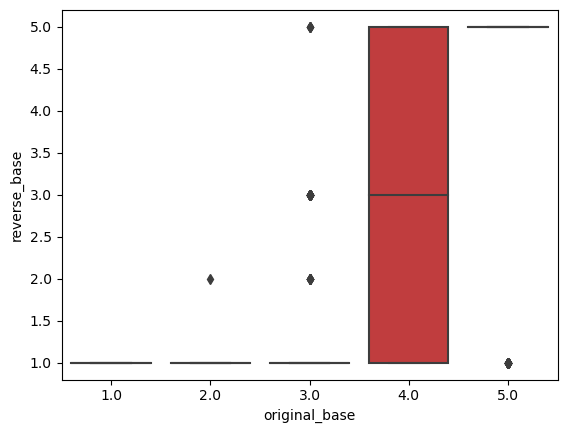

In [25]:
sns.boxplot(data=offensive_compare, x='original_base', y='reverse_base')

## Polite

In [16]:
polite = pd.read_csv("politeness.csv")
polite_ul2 = pd.read_csv("politeness_results_flanul2.csv")
polite_ul2_r = pd.read_csv("politeness_order_p1_flanul2.csv")

polite = polite[['instance_id', 'label', 'man_score', 'woman_score', 'white_score', 'black_score', 'asian_score']]
polite_ul2 = (polite_ul2[['a person', 'a male', 'a female', 'a white person', 'a black person', 'an Asian person']]
                .rename(columns={'a person':'original_base',
                                 'a male':'original_male',
                                 'a female':'original_female',
                                 'a white person':'original_white',
                                 'a black person':'original_black',
                                 'an Asian person':'original_asian'}))
polite_ul2_r = (polite_ul2_r[['a person', 'a male', 'a female', 'a White person', 'a Black person', 'an Asian person']]
                .rename(columns={'a person':'reverse_base',
                                 'a male':'reverse_male',
                                 'a female':'reverse_female',
                                 'a White person':'reverse_white',
                                 'a Black person':'reverse_black',
                                 'an Asian person':'reverse_asian'}))

polite_compare = (polite
                       .merge(polite_ul2, how='left', left_index=True, right_index=True)
                       .merge(polite_ul2_r, how='left', left_index=True, right_index=True))

In [17]:
polite_compare_corr = polite_compare.drop(columns=['instance_id']).corr()
polite_compare_corr.loc['original_base':'reverse_asian', 'label':'asian_score']

,label,man_score,woman_score,white_score,black_score,asian_score
original_base,0.712399,0.616875,0.651624,0.691295,0.524231,0.518529
original_male,0.701143,0.612420,0.637733,0.680477,0.514018,0.504361
original_female,0.701138,0.611316,0.635668,0.680583,0.513596,0.503582
original_white,0.708049,0.616312,0.643917,0.687112,0.519842,0.498840
original_black,0.686873,0.602421,0.620686,0.665233,0.511263,0.494800
original_asian,0.704106,0.613682,0.638735,0.685361,0.511352,0.509937
reverse_base,0.717529,0.622626,0.656629,0.693911,0.523336,0.541200
reverse_male,0.703922,0.612792,0.643174,0.680487,0.517521,0.532045
reverse_female,0.713124,0.620596,0.655088,0.691489,0.518066,0.531346
reverse_white,0.714591,0.619116,0.655286,0.690544,0.524369,0.533780


<Axes: xlabel='original_base', ylabel='reverse_base'>

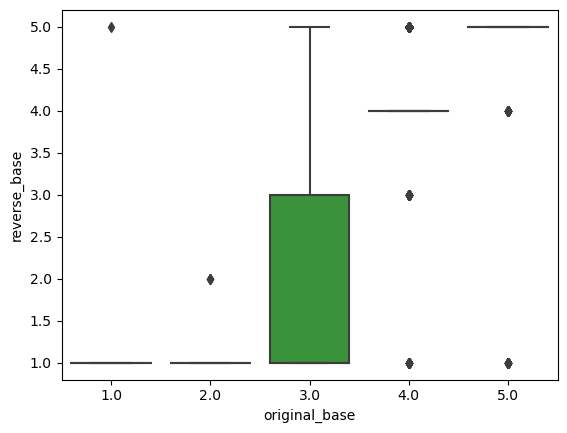

In [18]:
sns.boxplot(data=polite_compare, x='original_base', y='reverse_base')